In [12]:
import pandas as pd

# Google Play Store App-Daten
apps_df = pd.read_csv("input/googleplaystore.csv")

# Nutzerbewertungen (optional für später)
reviews_df = pd.read_csv("input/googleplaystore_user_reviews.csv")


In [13]:
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
# Installs bereinigen: "+" und "," entfernen und zu Zahlen umwandeln
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Rating als Zahl
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

# Zeilen mit fehlenden Werten bei Installs oder Rating entfernen
apps_df.dropna(subset=['Installs', 'Rating'], inplace=True)


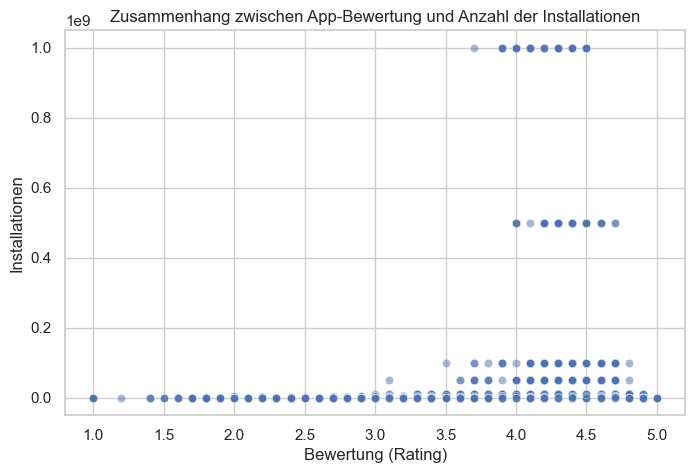

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=apps_df, x='Rating', y='Installs', alpha=0.5)
plt.title("Zusammenhang zwischen App-Bewertung und Anzahl der Installationen")
plt.xlabel("Bewertung (Rating)")
plt.ylabel("Installationen")
plt.grid(True)
plt.show()


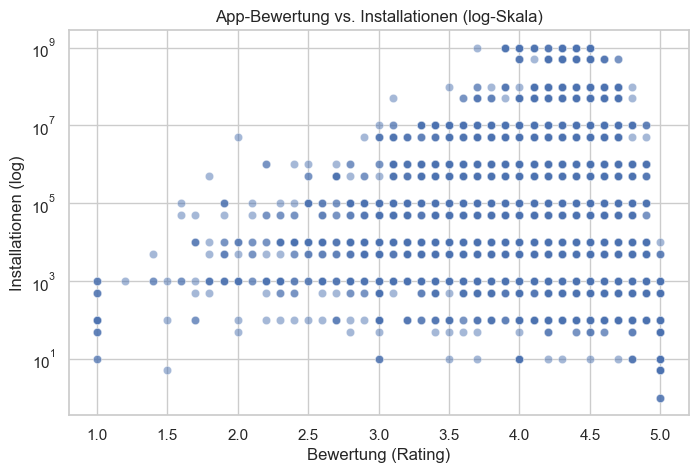

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=apps_df, x='Rating', y='Installs', alpha=0.5)
plt.yscale('log')  # log-Skala für bessere Darstellung
plt.title("App-Bewertung vs. Installationen (log-Skala)")
plt.xlabel("Bewertung (Rating)")
plt.ylabel("Installationen (log)")
plt.grid(True)
plt.show()


Je höher die Bewertung (x-Achse), desto höher tendenziell auch die Installationszahlen.

Es gibt sehr viele Apps mit Bewertung > 4,0, die zwischen 10.000 und 10 Mio. Installationen haben.

Extrem viele Installationen (10⁸ bis 10⁹) kommen fast nur bei Top-bewerteten Apps vor (meist 4.4 bis 4.7).

Es gibt aber auch Ausreißer:

    Manche Apps mit Bewertung < 3 haben dennoch viele Installationen → evtl. bekannte Marken, Pflicht-Apps o. Ä.

    Viele Apps mit Bewertung > 4 haben trotzdem nur wenige Installationen → evtl. neu, nischig oder schlecht vermarktet.

/var/folders/_0/9685wbq50hq47s46lsfcx4x00000gn/T/ipykernel_38950/1715395671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


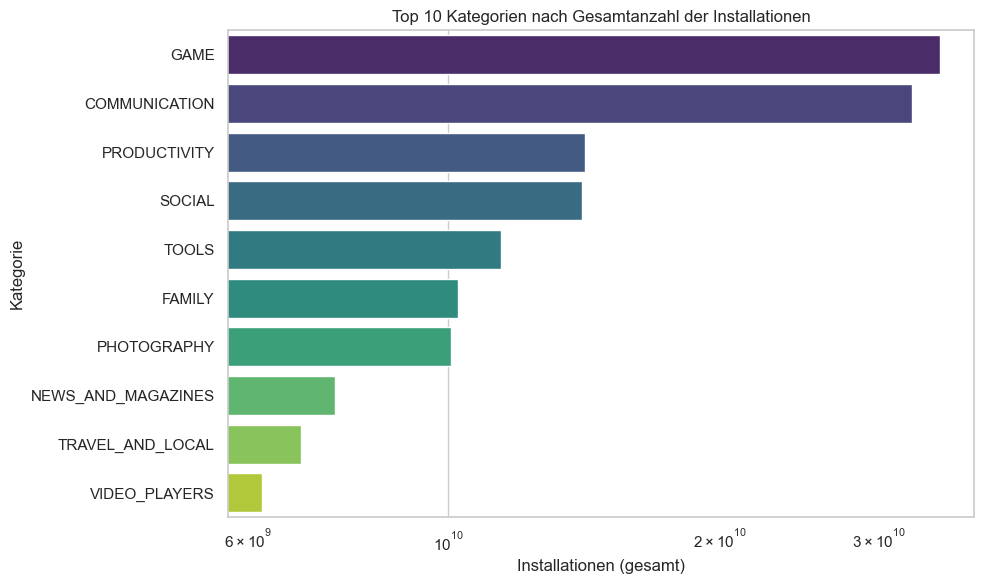

In [17]:
# Installationen nach Kategorie gruppieren
top_categories = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Balkendiagramm
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Kategorien nach Gesamtanzahl der Installationen")
plt.xlabel("Installationen (gesamt)")
plt.ylabel("Kategorie")
plt.xscale("log")  # wegen großer Werteunterschiede
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


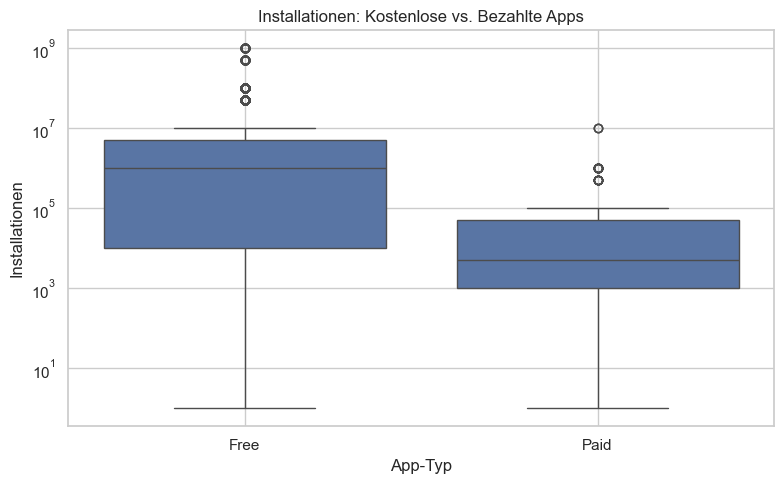

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=apps_df[apps_df['Type'].isin(['Free', 'Paid'])], x='Type', y='Installs')
plt.title("Installationen: Kostenlose vs. Bezahlte Apps")
plt.xlabel("App-Typ")
plt.ylabel("Installationen")
plt.yscale('log')  # Log-Skala zeigt Verteilung besser
plt.grid(True)
plt.tight_layout()
plt.show()


🔹 Free (Kostenlose Apps):

    Median (dicker Balken): liegt deutlich höher als bei Paid – also werden kostenlose Apps häufiger heruntergeladen.

    Die Verteilung ist breiter, d. h. einige kostenlose Apps erreichen extrem hohe Installationen (10⁸–10⁹ → z. B. WhatsApp, TikTok).

    Viele Ausreißer nach oben (die kleinen Kreise) → Top-Performer im Markt.

🔹 Paid (Bezahlte Apps):

    Deutlich weniger Installationen insgesamt.

    Median ist niedrig (10³–10⁴ Installationen), die meisten Paid-Apps bleiben nischig.

    Auch hier gibt es ein paar Ausreißer, aber deutlich weniger.

In [19]:
# Gruppieren nach Kategorie
category_summary = apps_df.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'sum',
    'App': 'count'
}).reset_index()

# Umbenennen für Klarheit
category_summary.columns = ['Category', 'Avg_Rating', 'Total_Installs', 'Num_Apps']

# Sortieren nach Bewertung + Installationen
category_summary_sorted = category_summary.sort_values(by=['Avg_Rating', 'Total_Installs'], ascending=False)

category_summary_sorted.head(10)  # Zeige Top-Kombis


,Category,Avg_Rating,Total_Installs,Num_Apps
10,EVENTS,4.435556,1.594941e+07,45
8,EDUCATION,4.389032,8.713520e+08,155
0,ART_AND_DESIGN,4.358065,1.242331e+08,62
3,BOOKS_AND_REFERENCE,4.346067,1.921292e+09,178
23,PERSONALIZATION,4.335987,2.325353e+09,314
22,PARENTING,4.300000,3.111611e+07,50
14,GAME,4.286326,3.508586e+10,1097
2,BEAUTY,4.278571,2.691620e+07,42
15,HEALTH_AND_FITNESS,4.277104,1.583056e+09,297
26,SHOPPING,4.259664,3.247832e+09,238


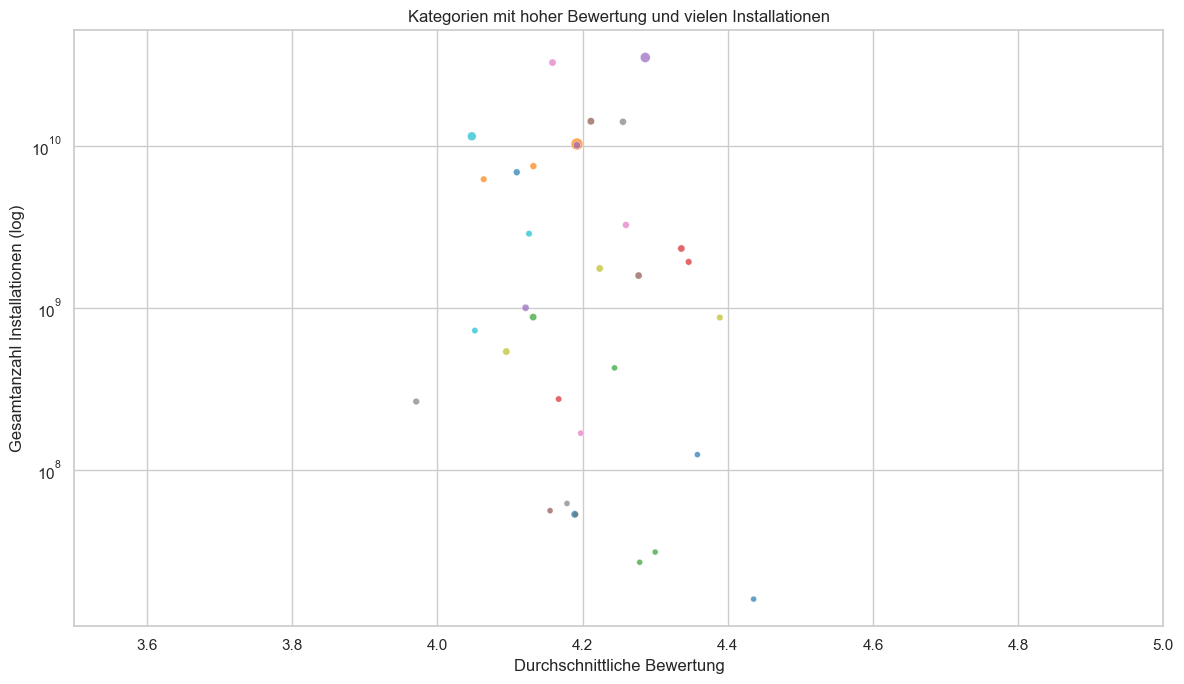

In [20]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=category_summary,
    x='Avg_Rating',
    y='Total_Installs',
    size='Num_Apps',
    hue='Category',
    palette='tab10',
    legend=False,
    alpha=0.7
)
plt.xlim(3.5, 5)
plt.yscale('log')
plt.title("Kategorien mit hoher Bewertung und vielen Installationen")
plt.xlabel("Durchschnittliche Bewertung")
plt.ylabel("Gesamtanzahl Installationen (log)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Filter für hohe Bewertung und viele Installationen
top_combined = category_summary[
    (category_summary['Avg_Rating'] > 4.2) &
    (category_summary['Total_Installs'] > 1e9)
].sort_values(by=['Avg_Rating', 'Total_Installs'], ascending=False)

top_combined


,Category,Avg_Rating,Total_Installs,Num_Apps
3,BOOKS_AND_REFERENCE,4.346067,1.921292e+09,178
23,PERSONALIZATION,4.335987,2.325353e+09,314
14,GAME,4.286326,3.508586e+10,1097
15,HEALTH_AND_FITNESS,4.277104,1.583056e+09,297
26,SHOPPING,4.259664,3.247832e+09,238
27,SOCIAL,4.255598,1.406984e+10,259
28,SPORTS,4.223511,1.751131e+09,319
25,PRODUCTIVITY,4.211396,1.417607e+10,351


In [22]:
# Beispiel-Apps aus einer dieser Kategorien
apps_df[apps_df['Category'] == 'PRODUCTIVITY'].sort_values(by='Installs', ascending=False).head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
4170,Google Drive,PRODUCTIVITY,4.4,2728941,Varies with device,1.000000e+09,Free,0,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device


In [23]:
paid_apps = apps_df[apps_df['Type'] == 'Paid'].copy()

# Sortiere nach Installationen
paid_apps_sorted = paid_apps.sort_values(by='Installs', ascending=False)

# Zeige die Top 10
paid_apps_sorted[['App', 'Category', 'Installs', 'Rating', 'Price']].head(10)


,App,Category,Installs,Rating,Price
2241,Minecraft,FAMILY,10000000.0,4.5,$6.99
4034,Hitman Sniper,GAME,10000000.0,4.6,$0.99
4347,Minecraft,FAMILY,10000000.0,4.5,$6.99
9151,Lost Journey (Dreamsky),GAME,1000000.0,4.5,$0.99
7355,Threema,COMMUNICATION,1000000.0,4.5,$2.99
7417,Grand Theft Auto: San Andreas,GAME,1000000.0,4.4,$6.99
2883,Facetune - For Free,PHOTOGRAPHY,1000000.0,4.4,$5.99
2950,Facetune - For Free,PHOTOGRAPHY,1000000.0,4.4,$5.99
3403,Beautiful Widgets Pro,PERSONALIZATION,1000000.0,4.2,$2.49
5631,Five Nights at Freddy's,GAME,1000000.0,4.6,$2.99


In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=paid_apps, x='Price', y='Installs', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Preis (log)")
plt.ylabel("Installationen (log)")
plt.title("Preis vs. Installationen bei Bezahl-Apps")
plt.grid(True)

# Kein tight_layout -> direkt anzeigen
plt.show()


ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 800x500 with 1 Axes>